In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import resample
import joblib
import warnings
%matplotlib inline

In [3]:
data = pd.read_csv("data/diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
print(data.info())
print(data.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None
(768, 9)


In [5]:
missing_data = data.isnull().sum()
print(missing_data)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [6]:
# percentage of missing data 
missing_data_prct = (missing_data.sum()/data.shape[0])*100
print(missing_data_prct)

0.0


In [7]:
data.info

<bound method DataFrame.info of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
5              5      116             74              0        0  25.6   
6              3       78             50             32       88  31.0   
7             10      115              0              0        0  35.3   
8              2      197             70             45      543  30.5   
9              8      125             96              0        0   0.0   
10             4      110             92              0        0  37.6   
11            10      168             74              0        0  38.0   
12    

<AxesSubplot:xlabel='Outcome', ylabel='count'>

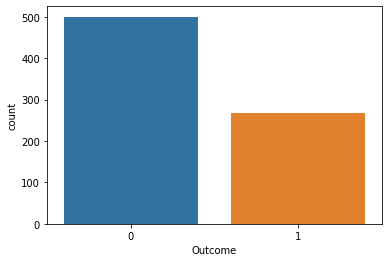

In [10]:
import seaborn as sns
sns.countplot(x="Outcome", data = data)

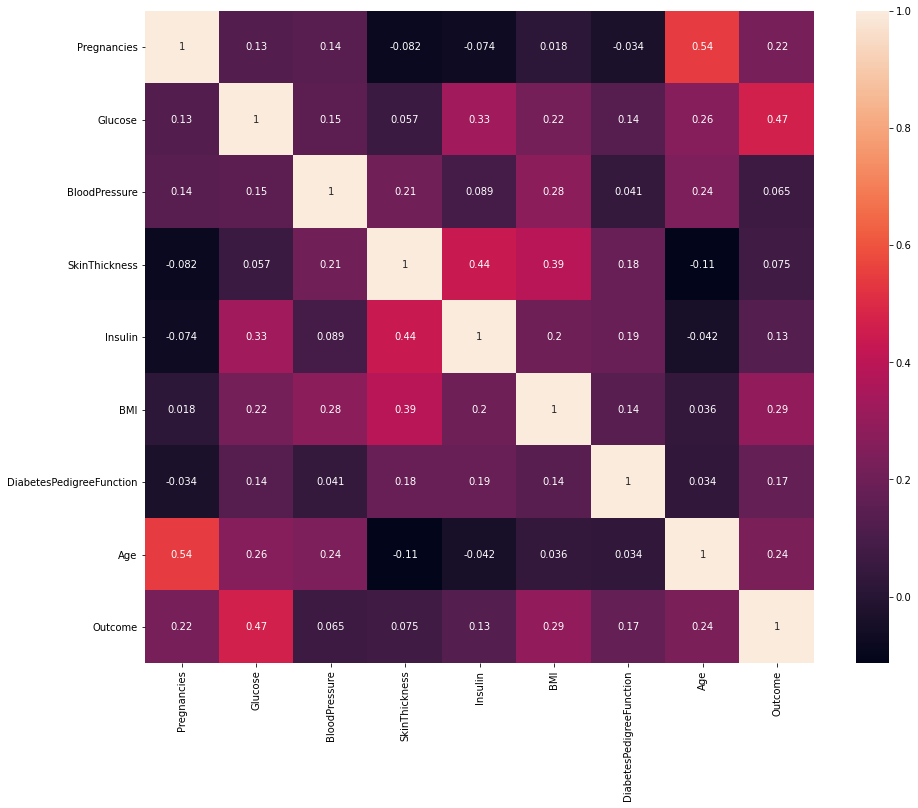

In [9]:
plt.figure(figsize=(15,12))
sns.heatmap(data.corr(), annot = True)
plt.show()

In [10]:
print(data.shape)

(768, 9)


In [12]:
X = data.iloc[:, 0:8]
y = data.iloc[:,8]

In [14]:
#print(y)

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [16]:
X_scaler = StandardScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [19]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


# LOGISTIC REGRESSION

In [20]:
from sklearn.linear_model import LogisticRegression
regression = LogisticRegression()
regression = regression.fit(X_train_scaled, y_train)
predictions = regression.predict(X_test_scaled)
print("*Confusion Matrix for LR: ")
print(confusion_matrix(y_test, predictions))
print("*Classification Report for LR: ")
print(classification_report(y_test, predictions))

*Confusion Matrix for LR: 
[[109  14]
 [ 29  40]]
*Classification Report for LR: 
              precision    recall  f1-score   support

           0       0.79      0.89      0.84       123
           1       0.74      0.58      0.65        69

    accuracy                           0.78       192
   macro avg       0.77      0.73      0.74       192
weighted avg       0.77      0.78      0.77       192



In [22]:
confusion = confusion_matrix(y_test, predictions)
TP = confusion[0, 0]
TN = confusion[0, 1]
FP = confusion[1, 0]
FN = confusion[1, 1]
classification_error = (FP + FN) / float(TP + TN + FP + FN)

print(classification_error)
val1 = accuracy_score(y_test, predictions) *100
print(val1)
from sklearn import metrics
LR_sensitivity = ((TP / float(FN + TP)))* 100

print(LR_sensitivity)
LR_specificity = ((TN / (TN + FP))) * 100

print(LR_specificity)

0.359375
77.60416666666666
73.15436241610739
32.55813953488372


# Random Forest

In [23]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
RF.fit(X_train_scaled, y_train)
predictions = RF.predict(X_test_scaled)
print("*Confusion Matrix for RF: ")
print(confusion_matrix(y_test, predictions))
print("*Classification Report for RF: ")
print(classification_report(y_test, predictions))

*Confusion Matrix for RF: 
[[108  15]
 [ 22  47]]
*Classification Report for RF: 
              precision    recall  f1-score   support

           0       0.83      0.88      0.85       123
           1       0.76      0.68      0.72        69

    accuracy                           0.81       192
   macro avg       0.79      0.78      0.79       192
weighted avg       0.80      0.81      0.80       192



In [25]:
confusion = confusion_matrix(y_test, predictions)
TP = confusion[0, 0]
TN = confusion[0, 1]
FP = confusion[1, 0]
FN = confusion[1, 1]
classification_error = (FP + FN) / float(TP + TN + FP + FN)

print(classification_error)
val2 = accuracy_score(y_test, predictions) *100
print(val2)
from sklearn import metrics
RF_sensitivity = ((TP / float(FN + TP)))* 100

print(RF_sensitivity)
RF_specificity = ((TN / (TN + FP))) * 100

print(RF_specificity)

0.359375
80.72916666666666
69.6774193548387
40.54054054054054


# DecisionTreeClassifier

In [26]:
from sklearn import tree
DT = tree.DecisionTreeClassifier()
DT.fit(X_train_scaled, y_train)
predictions = DT.predict(X_test_scaled)
print("*Confusion Matrix for DT: ")
print(confusion_matrix(y_test, predictions))
print("*Classification Report for DT: ")
print(classification_report(y_test, predictions))

*Confusion Matrix for DT: 
[[101  22]
 [ 29  40]]
*Classification Report for DT: 
              precision    recall  f1-score   support

           0       0.78      0.82      0.80       123
           1       0.65      0.58      0.61        69

    accuracy                           0.73       192
   macro avg       0.71      0.70      0.70       192
weighted avg       0.73      0.73      0.73       192



In [28]:
confusion = confusion_matrix(y_test, predictions)
TP = confusion[0, 0]
TN = confusion[0, 1]
FP = confusion[1, 0]
FN = confusion[1, 1]
classification_error = (FP + FN) / float(TP + TN + FP + FN)

print(classification_error)
val3 = accuracy_score(y_test, predictions) * 100
print(val3)
from sklearn import metrics
DT_sensitivity = ((TP / float(FN + TP))) * 100

print(DT_sensitivity)
DT_specificity = ((TN / (TN + FP))) * 100

print(DT_specificity)

0.359375
73.4375
71.63120567375887
43.13725490196079


# KNeighborsClassifier

In [29]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier()
KNN.fit(X_train_scaled, y_train)
predictions = KNN.predict(X_test_scaled)
print("*Confusion Matrix for KNN: ")
print(confusion_matrix(y_test, predictions))
print("*Classification Report for KNN: ")
print(classification_report(y_test, predictions))

*Confusion Matrix for KNN: 
[[108  15]
 [ 25  44]]
*Classification Report for KNN: 
              precision    recall  f1-score   support

           0       0.81      0.88      0.84       123
           1       0.75      0.64      0.69        69

    accuracy                           0.79       192
   macro avg       0.78      0.76      0.77       192
weighted avg       0.79      0.79      0.79       192



In [30]:
TP = confusion[0, 0]
TN = confusion[0, 1]
FP = confusion[1, 0]
FN = confusion[1, 1]
classification_error = (FP + FN) / float(TP + TN + FP + FN)

print(classification_error)
val4 = accuracy_score(y_test, predictions) * 100
print(val4)
from sklearn import metrics
KNN_sensitivity = ((TP / float(FN + TP))) * 100

print(KNN_sensitivity)
KNN_specificity = ((TN / (TN + FP))) * 100

print(KNN_specificity)

0.359375
79.16666666666666
71.63120567375887
43.13725490196079


# Support Vector Machine

In [31]:
from sklearn.svm import SVC
SVM = SVC()
SVM.fit(X_train_scaled, y_train)
predictions = SVM.predict(X_test_scaled)
print("*Confusion Matrix for SVM: ")
print(confusion_matrix(y_test, predictions))
print("*Classification Report for SVM: ")
print(classification_report(y_test, predictions))

*Confusion Matrix for SVM: 
[[112  11]
 [ 28  41]]
*Classification Report for SVM: 
              precision    recall  f1-score   support

           0       0.80      0.91      0.85       123
           1       0.79      0.59      0.68        69

    accuracy                           0.80       192
   macro avg       0.79      0.75      0.76       192
weighted avg       0.80      0.80      0.79       192



In [32]:
confusion = confusion_matrix(y_test, predictions)

TP = confusion[0, 0]
TN = confusion[0, 1]
FP = confusion[1, 0]
FN = confusion[1, 1]
classification_error = (FP + FN) / float(TP + TN + FP + FN)

print(classification_error)

val5 = accuracy_score(y_test, predictions) * 100
print(val5)
from sklearn import metrics
SVM_sensitivity = ((TP / float(FN + TP))) * 100

print(SVM_sensitivity)
SVM_specificity = ((TN / (TN + FP))) * 100

print(SVM_specificity)

0.359375
79.6875
73.20261437908496
28.205128205128204


# Model Comparsion Accuracy, Sensitivity & Specificity

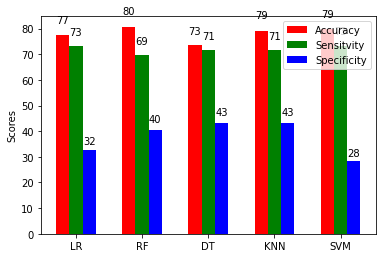

In [33]:
import numpy as np
import matplotlib.pyplot as plt

N = 5
ind = np.arange(N)  # the x locations for the groups
width = 0.2      # the width of the bars

fig = plt.figure()
ax = fig.add_subplot(111)

yvals = [val1,val2,val3,val4,val5]

rects1 = ax.bar(ind, yvals, width, color='r')
zvals = [LR_sensitivity,RF_sensitivity,DT_sensitivity,KNN_sensitivity,SVM_sensitivity]
rects2 = ax.bar(ind+width, zvals, width, color='g')
kvals = [LR_specificity,RF_specificity,DT_specificity,KNN_specificity,SVM_specificity]
rects3 = ax.bar(ind+width*2, kvals, width, color='b')

ax.set_ylabel('Scores')
ax.set_xticks(ind+width)
ax.set_xticklabels( ('LR','RF','DT','KNN','SVM') )
ax.legend( (rects1[0], rects2[0], rects3[0]), ('Accuracy', 'Sensitvity', 'Specificity') )

def autolabel(rects):
    for rect in rects:
        h = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2., 1.05*h, '%d'%int(h),
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

plt.show()

# Accuracy Comparsion

In [36]:
score = [val1,val2,val3,val4,val5]

In [37]:
#make variabel for save the result and to show it
classifier = ('Logistic Regression','Random Forest','Decision Tree','K-Nearest Neighbor','Suport Vector Machine')
y_pos = np.arange(len(classifier))
print(y_pos)
print(score)

[0 1 2 3 4]
[77.60416666666666, 80.72916666666666, 73.4375, 79.16666666666666, 79.6875]


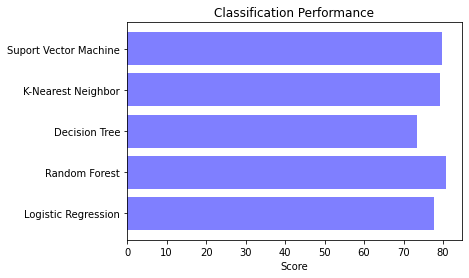

In [38]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, score, align='center', alpha=0.5,color='blue')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Score')
plt2.title('Classification Performance')
plt2.show()

In [41]:
filename = 'models/randomforest_model.sav'
joblib.dump(RF, filename)

['models/randomforest_model.sav']